In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

In [7]:
heart=pd.read_csv('cleaned-heart.csv')

## Data Preparation for visualisation

In [8]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(heart[["originalBMI","newBMI", "PhysicalHealthDays", "MentalHealthDays", "SleepHours","HaveCardiovascularDisease"]])
numeric_data.describe()

,originalBMI,newBMI,PhysicalHealthDays,MentalHealthDays,SleepHours
count,398223.000000,398223.000000,389284.000000,390863.000000,394099.000000
mean,28.544699,28.475160,4.375168,4.425001,7.024123
std,6.585290,6.743217,8.700598,8.398869,1.491042
min,13.653979,13.613761,0.000000,0.000000,1.000000
25%,24.107143,23.965430,0.000000,0.000000,6.000000
50%,27.375650,27.315409,0.000000,0.000000,7.000000
75%,31.807159,31.540693,4.000000,5.000000,8.000000
max,173.798748,200.487885,30.000000,30.000000,24.000000


In [9]:
## Extract only categorical data variables
categorical_data = pd.DataFrame(heart[["State","HaveCardiovascularDisease","GeneralHealth","HadDepressiveDisorder","RaceEthnicityCategory","AgeCategory","AlcoholDrinkers"]])
categorical_data.describe()

,State,HaveCardiovascularDisease,GeneralHealth,HadDepressiveDisorder,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers
count,398223,398223,397332,396074,387936,393576,374011
unique,54,2,5,2,5,13,2
top,Washington,No,Very good,No,"White only, Non-Hispanic",Age 65 to 69,Yes
freq,22978,361726,134332,312481,291164,42769,200743


In [10]:
object_columns = categorical_data.select_dtypes(include=['object']).columns
categorical_data[object_columns] = categorical_data[object_columns].fillna('Unknown')

# Step 3: Convert object-type columns to categorical type
categorical_data[object_columns] = categorical_data[object_columns].astype('category')

# Check for null values and data type
print(categorical_data.isnull().sum())
print(categorical_data.info())

State                        0
HaveCardiovascularDisease    0
GeneralHealth                0
HadDepressiveDisorder        0
RaceEthnicityCategory        0
AgeCategory                  0
AlcoholDrinkers              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398223 entries, 0 to 398222
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State                      398223 non-null  category
 1   HaveCardiovascularDisease  398223 non-null  category
 2   GeneralHealth              398223 non-null  category
 3   HadDepressiveDisorder      398223 non-null  category
 4   RaceEthnicityCategory      398223 non-null  category
 5   AgeCategory                398223 non-null  category
 6   AlcoholDrinkers            398223 non-null  category
dtypes: category(7)
memory usage: 2.7 MB
None


## Distribution of numerical data

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

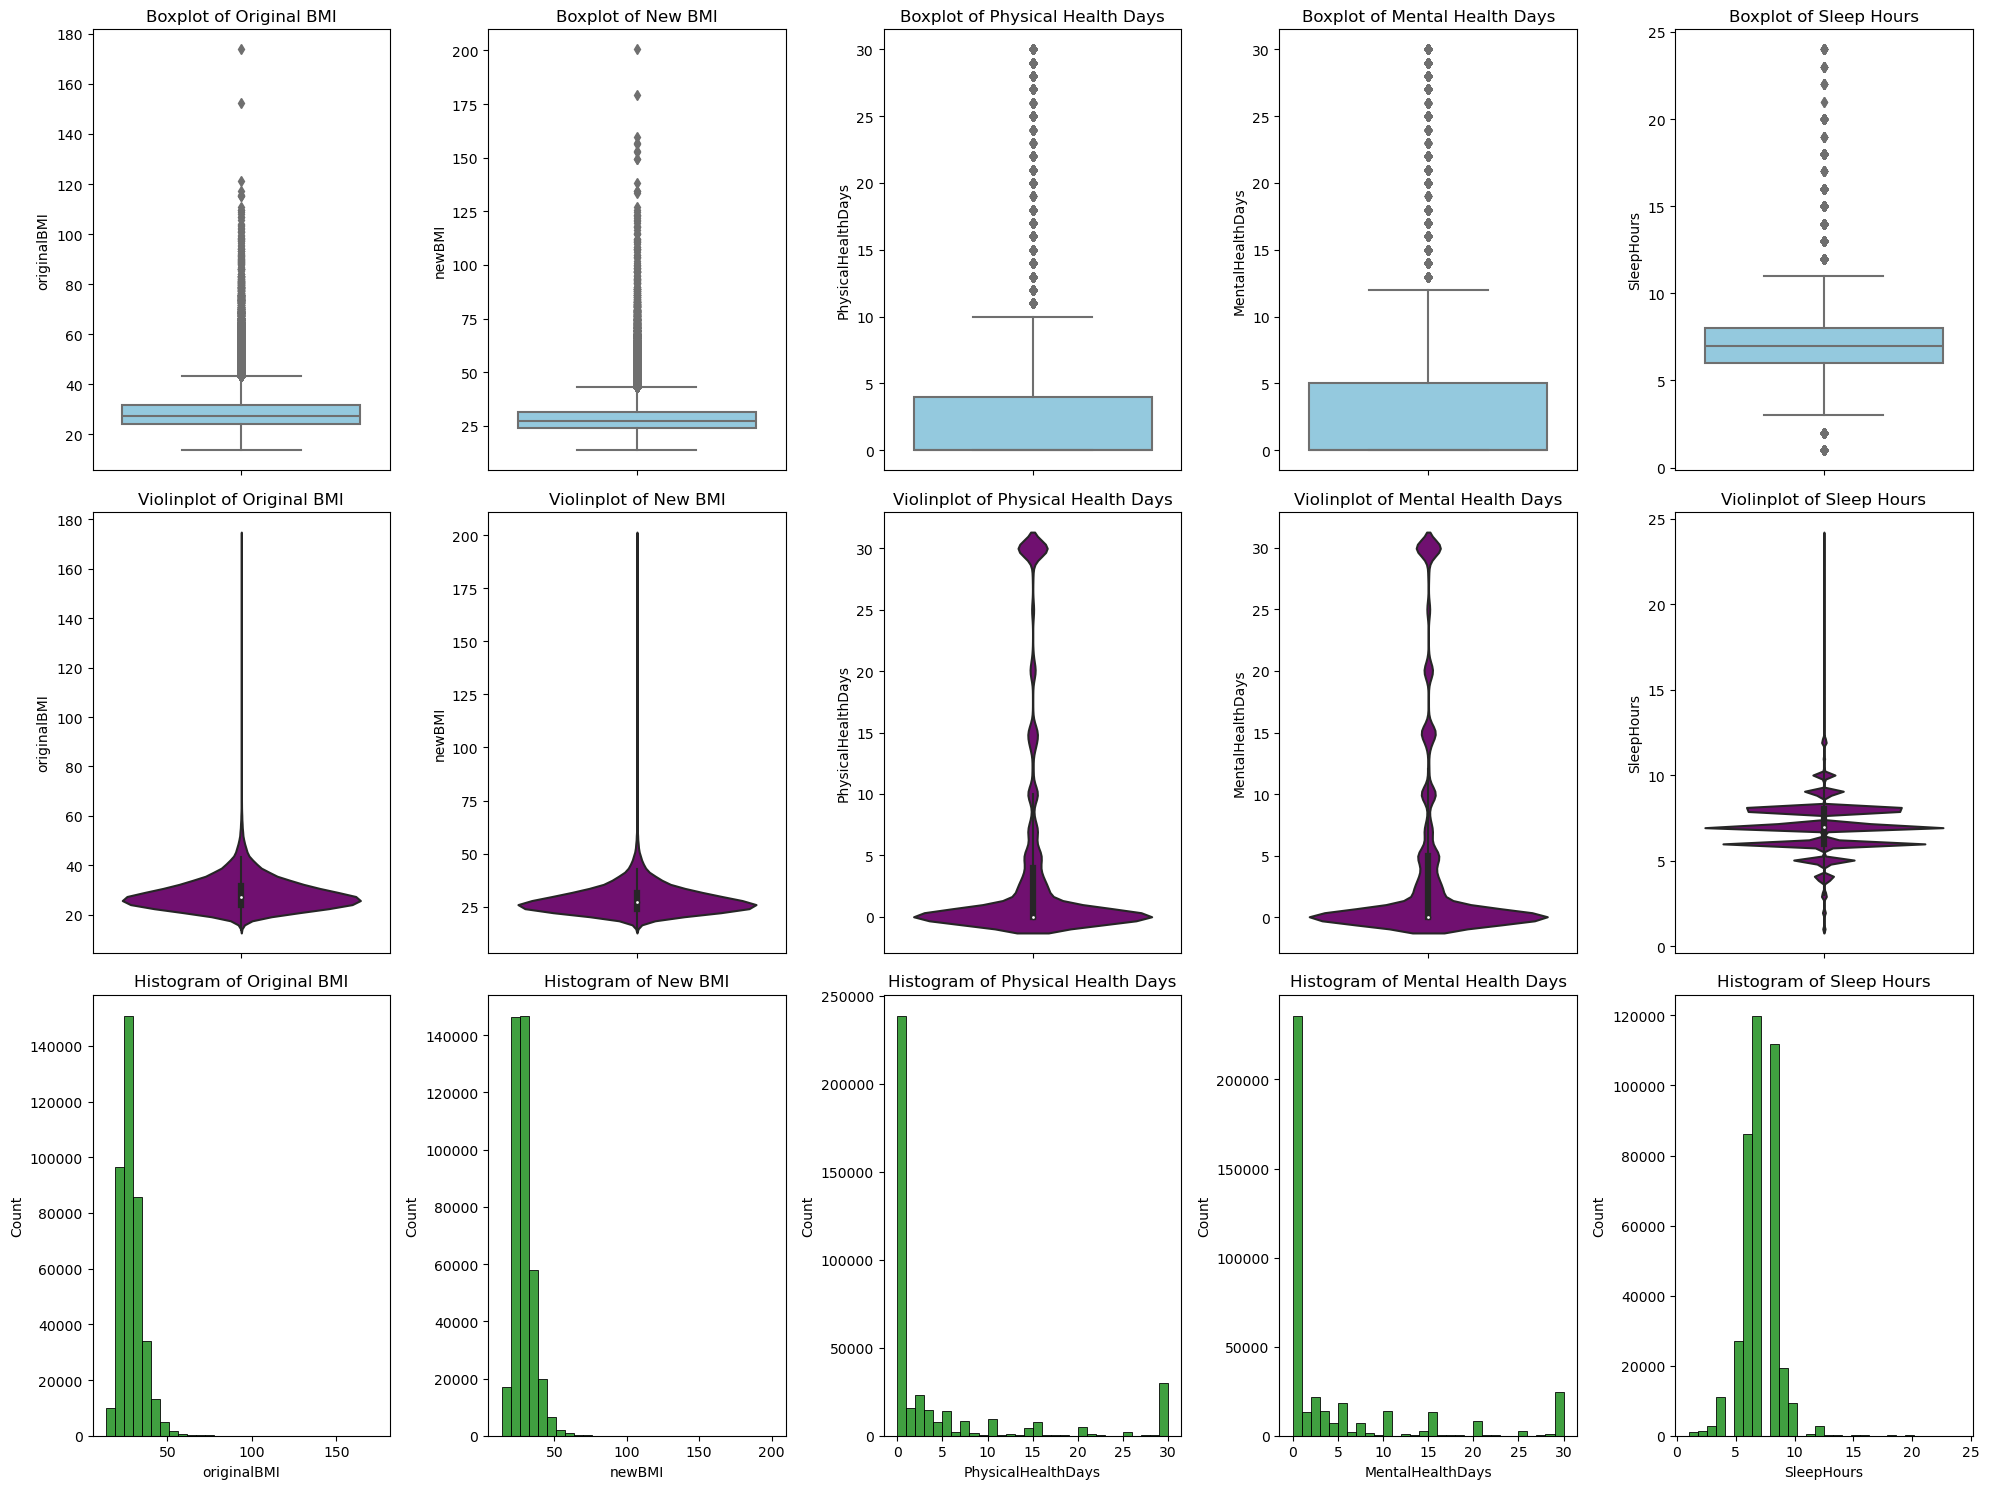

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(20, 15))

# Boxplots
sb.boxplot(data=numeric_data, y='originalBMI', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Boxplot of Original BMI')
sb.boxplot(data=numeric_data, y='newBMI', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Boxplot of New BMI')
sb.boxplot(data=numeric_data, y='PhysicalHealthDays', ax=axes[0, 2], color='skyblue')
axes[0, 2].set_title('Boxplot of Physical Health Days')
sb.boxplot(data=numeric_data, y='MentalHealthDays', ax=axes[0, 3], color='skyblue')
axes[0, 3].set_title('Boxplot of Mental Health Days')
sb.boxplot(data=numeric_data, y='SleepHours', ax=axes[0, 4], color='skyblue')
axes[0, 4].set_title('Boxplot of Sleep Hours')

# Violinplots
sb.violinplot(data=numeric_data, y='originalBMI', ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Violinplot of Original BMI')
sb.violinplot(data=numeric_data, y='newBMI', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Violinplot of New BMI')
sb.violinplot(data=numeric_data, y='PhysicalHealthDays', ax=axes[1, 2], color='purple')
axes[1, 2].set_title('Violinplot of Physical Health Days')
sb.violinplot(data=numeric_data, y='MentalHealthDays', ax=axes[1, 3], color='purple')
axes[1, 3].set_title('Violinplot of Mental Health Days')
sb.violinplot(data=numeric_data, y='SleepHours', ax=axes[1, 4], color='purple')
axes[1, 4].set_title('Violinplot of Sleep Hours')

# Histograms
sb.histplot(data=numeric_data, x='originalBMI', ax=axes[2, 0], color='green', bins=30)
axes[2, 0].set_title('Histogram of Original BMI')
sb.histplot(data=numeric_data, x='newBMI', ax=axes[2, 1], color='green', bins=30)
axes[2, 1].set_title('Histogram of New BMI')
sb.histplot(data=numeric_data, x='PhysicalHealthDays', ax=axes[2, 2], color='green', bins=30)
axes[2, 2].set_title('Histogram of Physical Health Days')
sb.histplot(data=numeric_data, x='MentalHealthDays', ax=axes[2, 3], color='green', bins=30)
axes[2, 3].set_title('Histogram of Mental Health Days')
sb.histplot(data=numeric_data, x='SleepHours', ax=axes[2, 4], color='green', bins=30)
axes[2, 4].set_title('Histogram of Sleep Hours')

plt.tight_layout()
plt.show()

The plots have been generated:

- Boxplots, violinplots, and histograms for each numerical variable: Original BMI, New BMI, Physical Health Days, Mental Health Days, and Sleep Hours.
- Each type of plot is colored differently for distinction: boxplots in sky blue, violinplots in purple, and histograms in green.

# Plotting boxplot between numerical data and heart[HaveCardiovascularDisease]

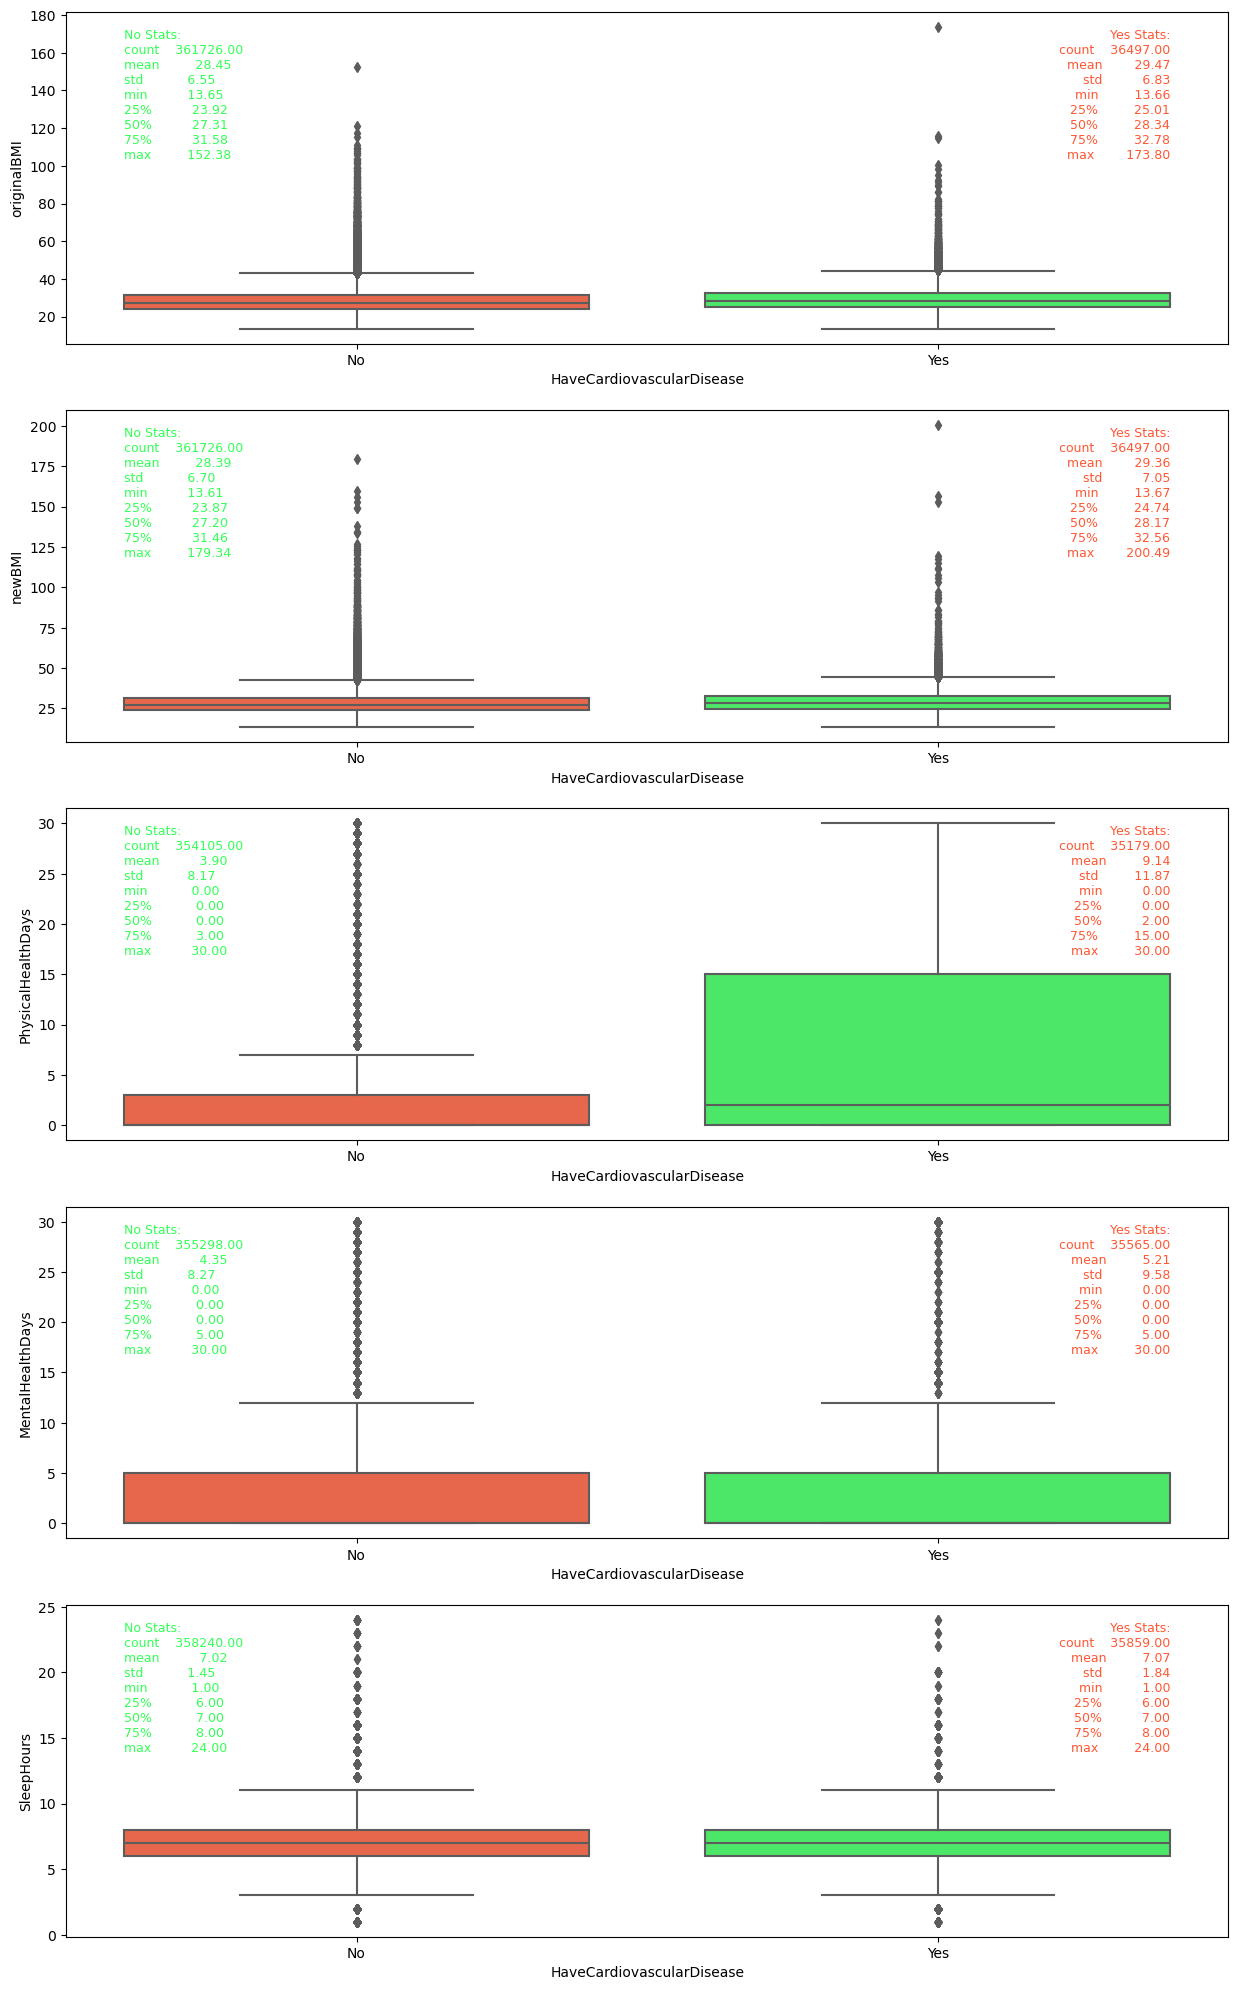

In [12]:
f, axes = plt.subplots(5, 1, figsize=(15, 25))

count = 0
for var in numeric_data:
    plot = sb.boxplot(x=numeric_data['HaveCardiovascularDisease'], y=numeric_data[var], data=numeric_data, ax=axes[count], palette=["#FF5733", "#33FF57"])
    # Get statistical summary and display it on the plots
    stats = numeric_data.groupby('HaveCardiovascularDisease')[var].describe()
    plt.text(0.95, 0.95, 'Yes Stats:\n' + stats.loc['Yes'].round(2).to_string(), horizontalalignment='right', verticalalignment='top', transform=axes[count].transAxes, fontsize=9, color="#FF5733")
    plt.text(0.05, 0.95, 'No Stats:\n' + stats.loc['No'].round(2).to_string(), horizontalalignment='left', verticalalignment='top', transform=axes[count].transAxes, fontsize=9, color="#33FF57")
    count += 1
    if count == 5:
        break

# Analysis

## Comparing newBMI and originalBMI
The new BMI is a measurement that accounts for the non-linear property in which people are scaled as the height increases. The new BMI is intended to adjust for shorter people having a lower BMI than expected and taller people having a higher BMI than expected, given the old calculation of BMI.

Given the boxplot above, for the orginal BMI, the medians for those without cardiovascular diseases and those with it are 27.31 and 28.34 respectively.
For the new BMI, the medians are 27.20 and 28.17 respectively. As expected, the values are slightly lower. However, the four values are still above the recommended BMI range of 18.0-25.0. It can be inferred that the average American can be considered slightly obese, based on BMI.



## PhysicalHealth and MentalHealth
The values represent how many days in a month does the surveyee feel physically unwell or mentally unwell. 
Given how the median for both physical and mental health has a value of 0 for those with and those without cardiovascular diseases, it can be said that surveyee's perception of their wellbeing is quite positive regardless of illness.
However, for physicalHealth, under the boxplot for those with cardiovascular diseases, the spread of data is wider, with a quarter of the surveyees having 2-15 physically unwell days per month, as compared to those without the diseases, a range of 0-3 days.
Thus, it is more likely for someone to be suffering from such illnesses given a higher number of physically unwell day. Although, there are quite a number of outliers in the boxplot.

## Sleep
Sleep quantity surprisingly seem to be the same, with or without cardiovascular diseases with a median of 7.00 for both.

In [13]:
# Remove the non-numeric column and calculate correlation matrix
numeric_data_without_cvd = numeric_data.drop(columns=['HaveCardiovascularDisease'])
numeric_data_without_cvd.corr()

,originalBMI,newBMI,PhysicalHealthDays,MentalHealthDays,SleepHours
originalBMI,1.000000,0.988936,0.112905,0.076455,-0.050149
newBMI,0.988936,1.000000,0.117958,0.082228,-0.046640
PhysicalHealthDays,0.112905,0.117958,1.000000,0.318200,-0.054565
MentalHealthDays,0.076455,0.082228,0.318200,1.000000,-0.129657
SleepHours,-0.050149,-0.046640,-0.054565,-0.129657,1.000000


The correlation matrix for the numerical variables has been generated. Here are the key observations:

- **BMI and newBMI**: There is a very high correlation (approximately 0.99) between the original BMI and the new BMI calculation, indicating that they are almost linearly dependent on each other.
- **Physical and Mental Health Days**: There is a moderate positive correlation (approximately 0.32) between the number of physical health days and mental health days, suggesting that individuals with more physically unhealthy days also tend to report more mentally unhealthy days.
- **Health Days and Sleep Hours**: Both physical and mental health days have a slight negative correlation with sleep hours, suggesting that more unhealthy days might be associated with fewer hours of sleep.

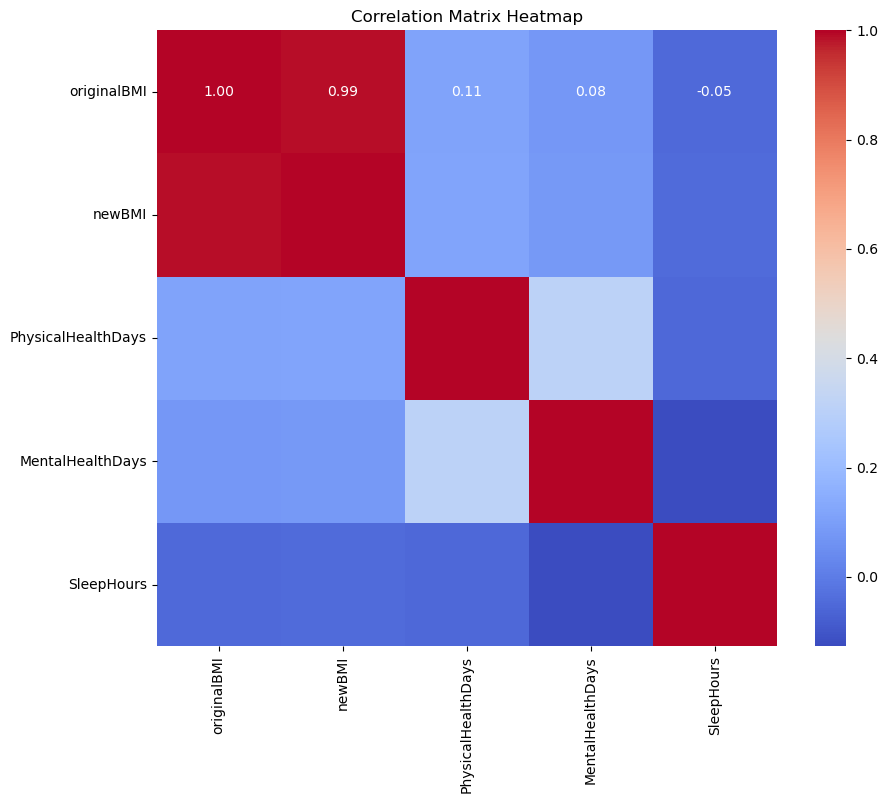

In [10]:
# Heatmap for the correlation matrix of numerical data without CVD
plt.figure(figsize=(10, 8))
sb.heatmap(numeric_data_without_cvd.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Distribution of the categorical data

Racial Demographic : 5
RaceEthnicityCategory
White only, Non-Hispanic         301451
Hispanic                          36867
Black only, Non-Hispanic          31047
Other race only, Non-Hispanic     20051
Multiracial, Non-Hispanic          8807
Name: count, dtype: int64


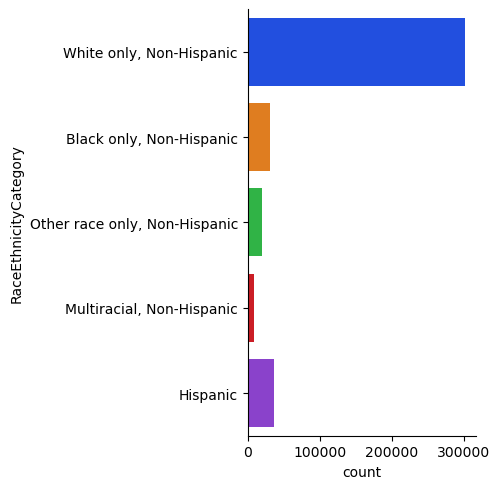

In [11]:
print("Racial Demographic :", len(heart["RaceEthnicityCategory"].unique()))

# types of races
print(heart["RaceEthnicityCategory"].value_counts())
sb.catplot(y = "RaceEthnicityCategory", data = heart, kind = "count", palette="bright")

Number of States : 54
State
Washington              22978
Minnesota               15294
New York                15096
Ohio                    14940
Maryland                14326
Texas                   12278
Florida                 11843
Kansas                  10227
Wisconsin               10116
Maine                    9799
Massachusetts            9746
California               9518
Virginia                 9411
Arizona                  9222
Indiana                  8878
South Carolina           8829
Utah                     8788
Michigan                 8779
Colorado                 8431
Connecticut              8243
Iowa                     8149
Georgia                  8047
Vermont                  7788
Hawaii                   7328
Nebraska                 6891
Missouri                 6883
South Dakota             6877
New Jersey               6796
Montana                  6562
New Hampshire            5940
Idaho                    5734
Alaska                   5310
Puerto Rico 

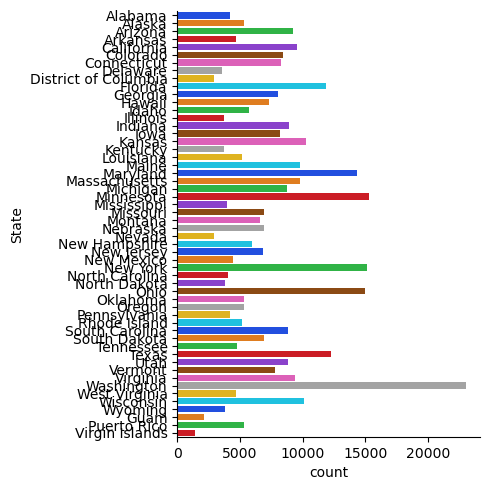

In [12]:
print("Number of States :", len(heart["State"].unique()))

# number of data entries from each state
print(heart["State"].value_counts())
sb.catplot(y = "State", data = heart, kind = "count",palette="bright")

Age Demographic : 13
AgeCategory
Age 65 to 69       47416
Age 60 to 64       40120
Age 70 to 74       39662
Age 80 or older    33340
Age 55 to 59       33052
Age 50 to 54       30031
Age 75 to 79       29883
Age 40 to 44       26702
Age 45 to 49       25509
Age 35 to 39       25488
Age 18 to 24       24224
Age 30 to 34       23000
Age 25 to 29       19796
Name: count, dtype: int64


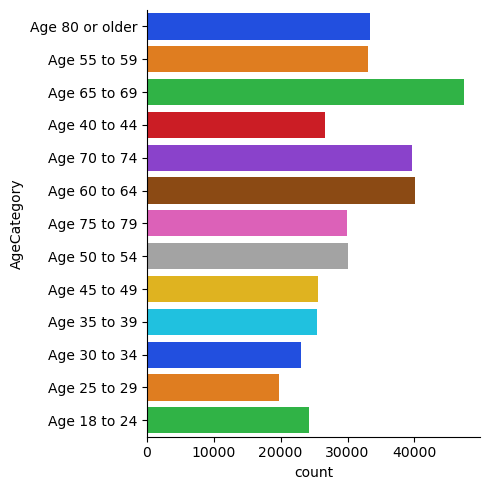

In [13]:
print("Age Demographic :", len(heart["AgeCategory"].unique()))

# number of data entries from each age group
print(heart["AgeCategory"].value_counts())
sb.catplot(y = "AgeCategory", data = heart, kind = "count",palette="bright")

## Plotting each categorical data variable against heart[HaveCardiovascularDisease]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


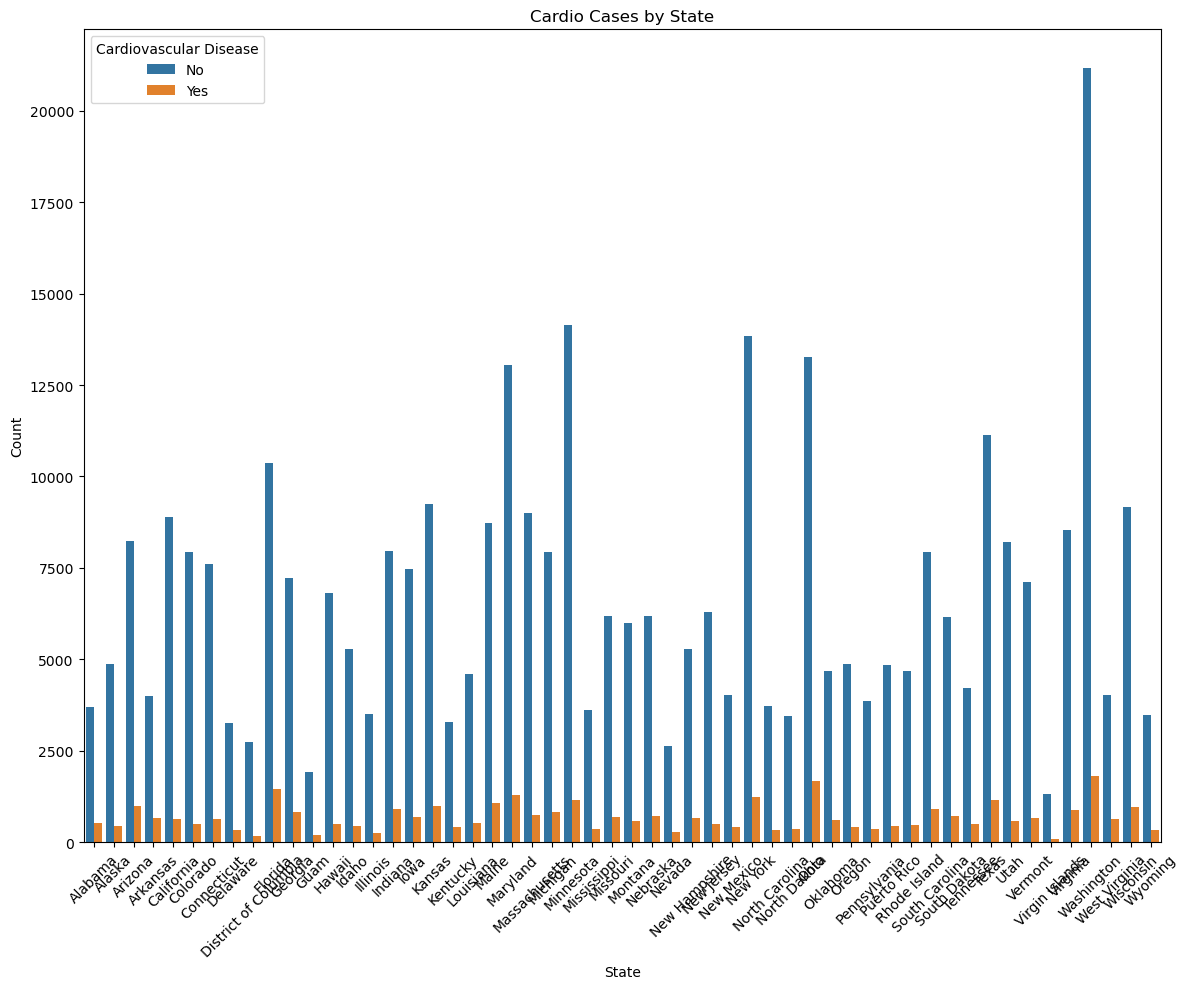

In [14]:
plt.figure(figsize=(12, 10))
sb.countplot(x='State', hue='HaveCardiovascularDisease', data=categorical_data)
plt.title('Cardio Cases by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'])
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

In [15]:
# Calculate percentage of 'Yes' cases of cardiovascular disease for each state
total_counts = categorical_data.groupby('State')['HaveCardiovascularDisease'].count()
total_yes_counts = categorical_data[categorical_data['HaveCardiovascularDisease'] == 'Yes'].groupby('State')['HaveCardiovascularDisease'].count()
percentage = (total_yes_counts / total_counts) * 100
# Display percentages as sentences
print("Percentage of Cases with Cardiovascular Disease by State:")
for state, p in percentage.items():
    print(f"{state}: {p:.2f}%")

Percentage of Cases with Cardiovascular Disease by State:
Alabama: 12.57%
Alaska: 8.38%
Arizona: 10.80%
Arkansas: 14.16%
California: 6.53%
Colorado: 5.88%
Connecticut: 7.64%
Delaware: 9.02%
District of Columbia: 5.80%
Florida: 12.40%
Georgia: 10.23%
Guam: 8.92%
Hawaii: 6.85%
Idaho: 7.71%
Illinois: 6.76%
Indiana: 10.26%
Iowa: 8.36%
Kansas: 9.56%
Kentucky: 11.24%
Louisiana: 10.47%
Maine: 11.00%
Maryland: 8.96%
Massachusetts: 7.55%
Michigan: 9.57%
Minnesota: 7.54%
Mississippi: 9.32%
Missouri: 10.08%
Montana: 8.75%
Nebraska: 10.40%
Nevada: 9.69%
New Hampshire: 10.94%
New Jersey: 7.37%
New Mexico: 9.47%
New York: 8.26%
North Carolina: 8.10%
North Dakota: 9.49%
Ohio: 11.25%
Oklahoma: 11.63%
Oregon: 7.71%
Pennsylvania: 8.34%
Puerto Rico: 8.54%
Rhode Island: 9.14%
South Carolina: 10.21%
South Dakota: 10.50%
Tennessee: 10.80%
Texas: 9.35%
Utah: 6.55%
Vermont: 8.51%
Virgin Islands: 5.45%
Virginia: 9.33%
Washington: 7.88%
West Virginia: 13.60%
Wisconsin: 9.45%
Wyoming: 8.56%


C:\Users\User\AppData\Local\Temp\ipykernel_14096\3867788430.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = categorical_data.groupby('State')['HaveCardiovascularDisease'].count()
C:\Users\User\AppData\Local\Temp\ipykernel_14096\3867788430.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_yes_counts = categorical_data[categorical_data['HaveCardiovascularDisease'] == 'Yes'].groupby('State')['HaveCardiovascularDisease'].count()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


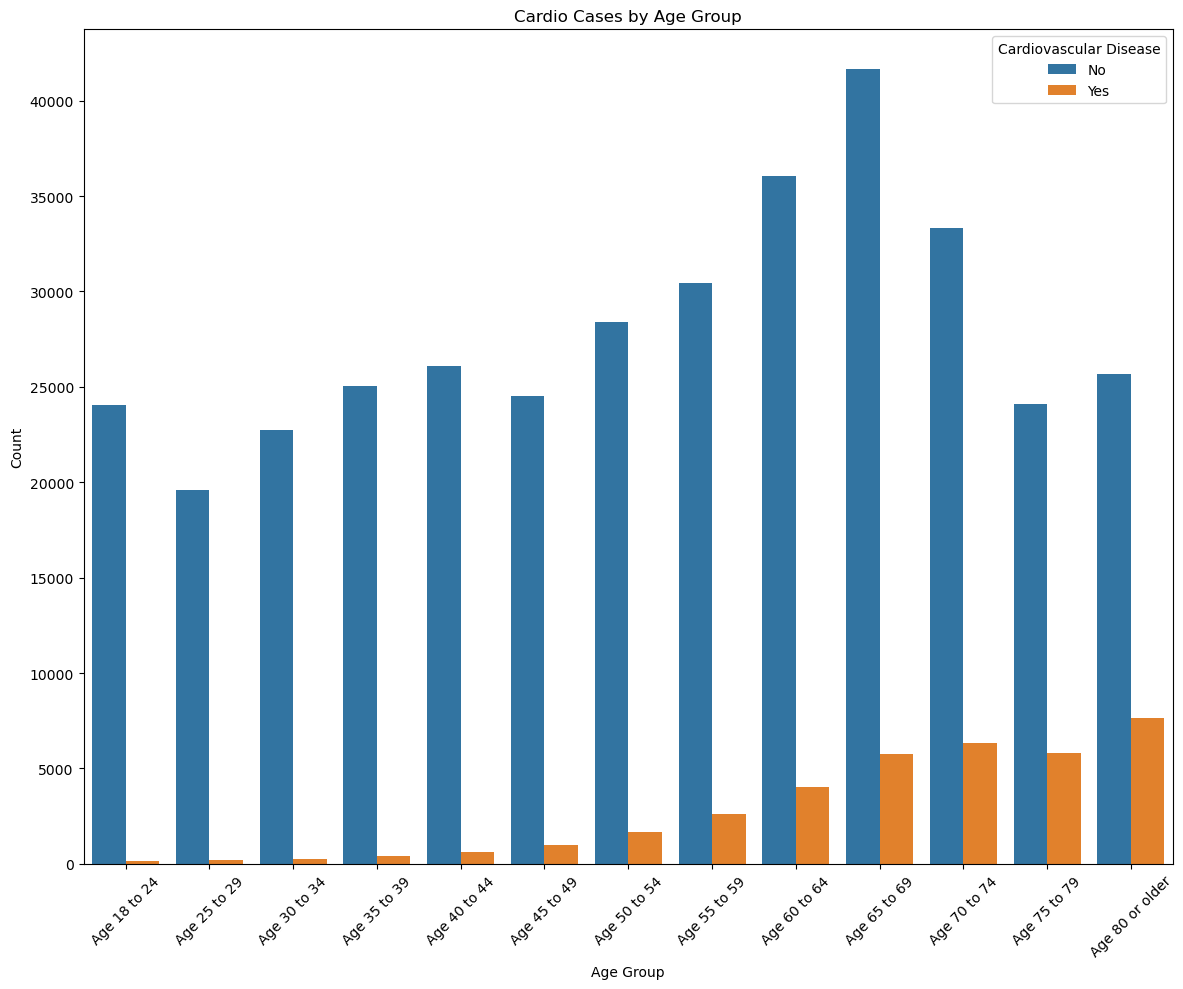

In [16]:
plt.figure(figsize=(12, 10))
sb.countplot(x='AgeCategory', hue='HaveCardiovascularDisease', data=categorical_data)


plt.title('Cardio Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'])
plt.tight_layout()

plt.show()

In [17]:
# Calculate percentage of 'Yes' cases of cardiovascular disease for each age group
total_counts = categorical_data.groupby('AgeCategory')['HaveCardiovascularDisease'].count()
total_yes_counts = categorical_data[categorical_data['HaveCardiovascularDisease'] == 'Yes'].groupby('AgeCategory')['HaveCardiovascularDisease'].count()
percentage = (total_yes_counts / total_counts) * 100
# Display percentages as sentences
print("Percentage of Cases with Cardiovascular Disease by Age Group:")
for age_group, p in percentage.items():
    print(f"{age_group}: {p:.2f}%")

Percentage of Cases with Cardiovascular Disease by Age Group:
Age 18 to 24: 0.70%
Age 25 to 29: 0.92%
Age 30 to 34: 1.19%
Age 35 to 39: 1.65%
Age 40 to 44: 2.34%
Age 45 to 49: 3.81%
Age 50 to 54: 5.50%
Age 55 to 59: 7.91%
Age 60 to 64: 10.08%
Age 65 to 69: 12.15%
Age 70 to 74: 15.94%
Age 75 to 79: 19.38%
Age 80 or older: 23.00%


C:\Users\User\AppData\Local\Temp\ipykernel_14096\4253127977.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = categorical_data.groupby('AgeCategory')['HaveCardiovascularDisease'].count()
C:\Users\User\AppData\Local\Temp\ipykernel_14096\4253127977.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_yes_counts = categorical_data[categorical_data['HaveCardiovascularDisease'] == 'Yes'].groupby('AgeCategory')['HaveCardiovascularDisease'].count()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


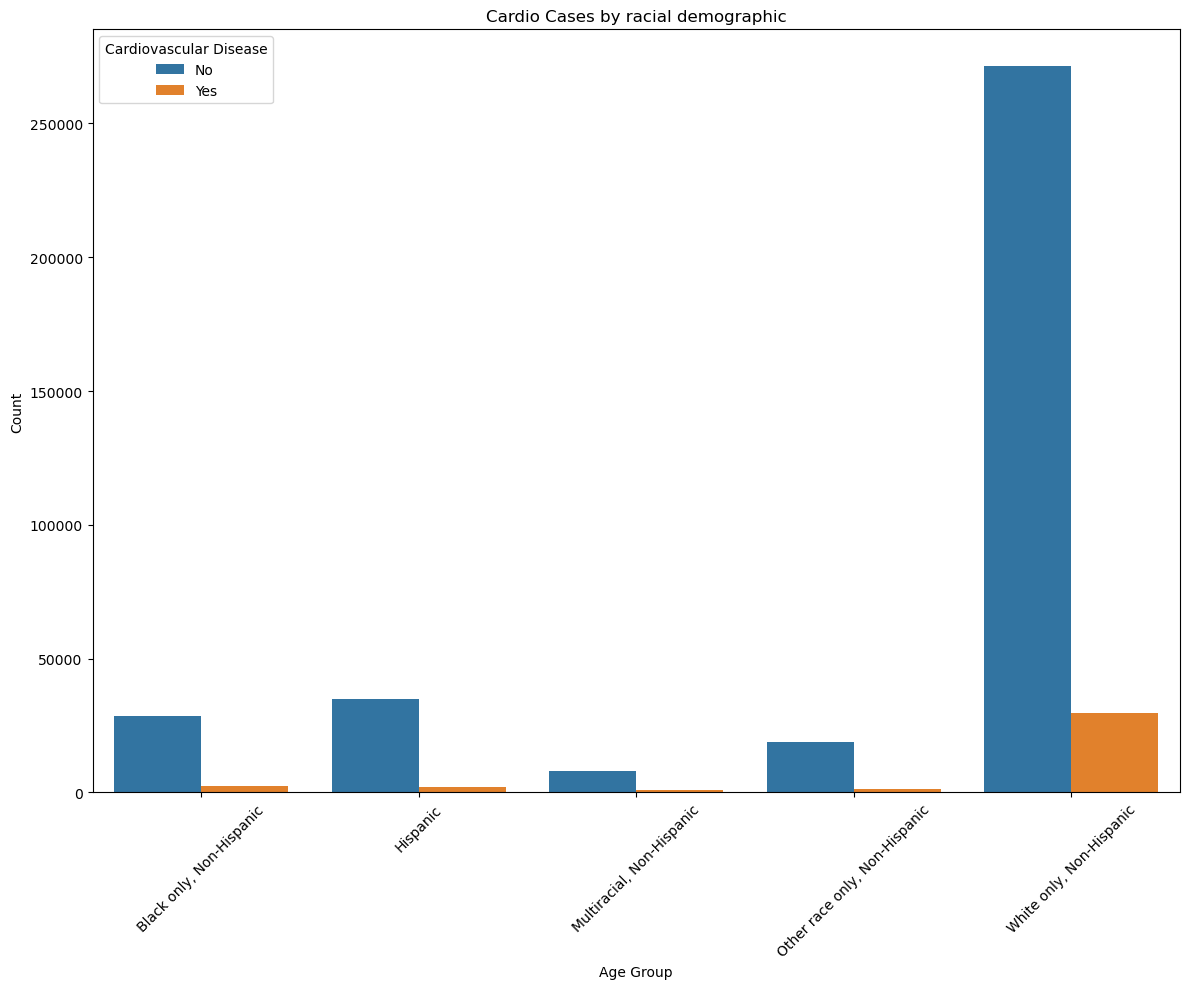

In [18]:
plt.figure(figsize=(12, 10))
sb.countplot(x='RaceEthnicityCategory', hue='HaveCardiovascularDisease', data=categorical_data)
plt.title('Cardio Cases by racial demographic')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'])
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

In [19]:
# Calculate percentage of 'Yes' cases of cardiovascular disease for each racial demo
total_counts = categorical_data.groupby('RaceEthnicityCategory')['HaveCardiovascularDisease'].count()
total_yes_counts = categorical_data[categorical_data['HaveCardiovascularDisease'] == 'Yes'].groupby('RaceEthnicityCategory')['HaveCardiovascularDisease'].count()
percentage = (total_yes_counts / total_counts) * 100
# Display percentages as sentences
print("Percentage of Cases with Cardiovascular Disease by RaceEthnicityCategory:")
for race_ethnicity, p in percentage.items():
    print(f"{race_ethnicity}: {p:.2f}%")

Percentage of Cases with Cardiovascular Disease by RaceEthnicityCategory:
Black only, Non-Hispanic: 7.69%
Hispanic: 5.74%
Multiracial, Non-Hispanic: 9.07%
Other race only, Non-Hispanic: 6.69%
White only, Non-Hispanic: 9.90%


C:\Users\User\AppData\Local\Temp\ipykernel_14096\4226755961.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = categorical_data.groupby('RaceEthnicityCategory')['HaveCardiovascularDisease'].count()
C:\Users\User\AppData\Local\Temp\ipykernel_14096\4226755961.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_yes_counts = categorical_data[categorical_data['HaveCardiovascularDisease'] == 'Yes'].groupby('RaceEthnicityCategory')['HaveCardiovascularDisease'].count()


# Analysis of Distribution of Data
Within each Categorical variable (age, state, race), there exists >1000 data entries per category in each variable. As such, it is fair to say the representation of each group is relatively accurate.
## State
Arkansas has the highest percentage of cases at 14.16%, followed by West Virginia at 13.60%. On the other hand, Virgin Islands has the lowest percentage of 5.45%, followed by District of Columbia with the second-lowest percentage at 5.80%.

## Age Group
There is a noticeable trend in the percentage of cases as the age group increases. Particularly, percentage of cases for Age 18-24 is at 0.70%, which steadily increases to 23.00% for those aged 80 or older.

## Race/ethnicity
White, non-hispanic people have the highest percentage of cases at 9.90%, while Hispanic people have the lowest race of 5.74%.